In [591]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import shutil

# Extract audio files and sort into respective folder for classification

In [592]:
sound_path = "./SoundFiles"


for i in range(1,9): 
    emo = "0"+str(i)
    save_path = os.path.join("./Emotions",emo)
    if not os.path.exists(save_path):
         os.makedirs(save_path)




for root,dirs,files in os.walk(sound_path):
    for file in files:
        emotion = file.split("-")[2]
        save_path = os.path.join("./Emotions",emotion)
        dir_path = os.path.join(root,file)
        shutil.copy(dir_path,save_path)
        
        
        

       
               

# Function to generate mel spectogram

In [593]:
import librosa

specto_path = "./Spectogram"
emotion_file_path = "./Emotions"


def generate_and_save_spectrogram(audio_path,dest):
    try:
        y, sr = librosa.load(audio_path, sr=None)
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)

   
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

  
        plt.figure(figsize=(4, 4))
        librosa.display.specshow(mel_spectrogram_db, sr=sr, hop_length=512, x_axis=None, y_axis=None)
        plt.axis('off')
        plt.tight_layout(pad=0)

   
        plt.savefig(dest, format='png', bbox_inches='tight', pad_inches=0)
        plt.close()
    except Exception as e:
        print(f"An error occurred: {e}")
        return None



    




# Store Images in designated folder by classes

In [594]:
for root,dirs,files in os.walk("Emotions"):
    itr = 0
    for file in files:
        src_path = os.path.join(root,file)
        dest_folder = os.path.join("./Spectogram",file.split("-")[2])

        if not os.path.exists(dest_folder):
            os.makedirs(dest_folder)
        dest_path = os.path.join(dest_folder,str(itr)+'.png')
        spectogram_img = generate_and_save_spectrogram(src_path,dest_path)
        itr+=1

# Create Dataframe

In [595]:
labels = []
path_files = []


for root,dirs,files in os.walk("Spectogram"):
   
   
    for file in files:
         label = root.split("\\")[1]
         labels.append(label)
         path_files.append(os.path.join(root,file))
             
         



paths = pd.DataFrame(path_files,columns=["Images"])
label_codes = pd.DataFrame(labels,columns=["Emotion"])

df = pd.concat([paths,label_codes],axis=1)
df
    

,Images,Emotion
0,Spectogram\01\0.png,01
1,Spectogram\01\1.png,01
2,Spectogram\01\10.png,01
3,Spectogram\01\11.png,01
4,Spectogram\01\12.png,01
...,...,...
1435,Spectogram\08\95.png,08
1436,Spectogram\08\96.png,08
1437,Spectogram\08\97.png,08
1438,Spectogram\08\98.png,08


In [596]:
final_path_train = "./Specto/train"
final_path_test = "./Specto/test"

if not os.path.exists(final_path_train):
    os.makedirs(final_path_train)

if not os.path.exists(final_path_test):
    os.makedirs(final_path_test)

X = df.iloc[:,0].values
Y = df.iloc[:,-1].values
print(X)
print(Y)

In [597]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

print(X_train)
print(y_train)

for index in range(len(X_train)):
    emotion = y_train[index]
    save_path = os.path.join("Specto","train",emotion)
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    save_path = os.path.join(save_path,str(index)+".png")   
    src_path = X_train[index]
    shutil.copy(src_path,save_path)

for index in range(len(X_test)):
    emotion = y_test[index]
    save_path = os.path.join("Specto","test",emotion)
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    save_path = os.path.join(save_path,str(index)+".png")   
    src_path = X_test[index]
    shutil.copy(src_path,save_path)
    

['Spectogram\\07\\33.png' 'Spectogram\\06\\135.png'
 'Spectogram\\07\\1.png' ... 'Spectogram\\07\\70.png'
 'Spectogram\\04\\17.png' 'Spectogram\\05\\109.png']
['07' '06' '07' ... '07' '04' '05']


In [598]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('Specto/train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1225 images belonging to 8 classes.


In [599]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Specto/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 281 images belonging to 8 classes.


In [600]:
cnn = tf.keras.models.Sequential()



In [601]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

C:\Users\Brandon Williams\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [602]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [603]:
cnn.add(tf.keras.layers.Flatten())

In [604]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [605]:
cnn.add(tf.keras.layers.Dense(units=8, activation='softmax'))

In [606]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [607]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15


C:\Users\Brandon Williams\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 17s 357ms/step - accuracy: 0.1772 - loss: 1.9905 - val_accuracy: 0.2776 - val_loss: 1.8777
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 329ms/step - accuracy: 0.3353 - loss: 1.7415 - val_accuracy: 0.3416 - val_loss: 1.6968
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 324ms/step - accuracy: 0.4146 - loss: 1.5061 - val_accuracy: 0.3630 - val_loss: 1.5671
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 320ms/step - accuracy: 0.5145 - loss: 1.2932 - val_accuracy: 0.4342 - val_loss: 1.4631
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 332ms/step - accuracy: 0.5896 - loss: 1.0634 - val_accuracy: 0.5089 - val_loss: 1.4092
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 322ms/step - accuracy: 0.6553 - loss: 0.9631 - val_accuracy: 0.5480 - val_loss: 1.3280
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 322ms/step - accuracy: 0.7923 - loss: 0.6124 - val_accuracy: 0.5658 - val_loss: 1.4653
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 319ms/step - accuracy: 0.8469 - loss: 0.4241 - val_accuracy: 0.619

[0.2775800824165344, 0.3416370153427124, 0.3629893362522125, 0.4341636896133423, 0.5088967680931091, 0.5480427145957947, 0.5658363103866577, 0.6192170977592468, 0.6690391302108765, 0.6334519386291504, 0.6405693888664246, 0.7153024673461914, 0.7153024673461914, 0.6975088715553284, 0.7010676264762878]


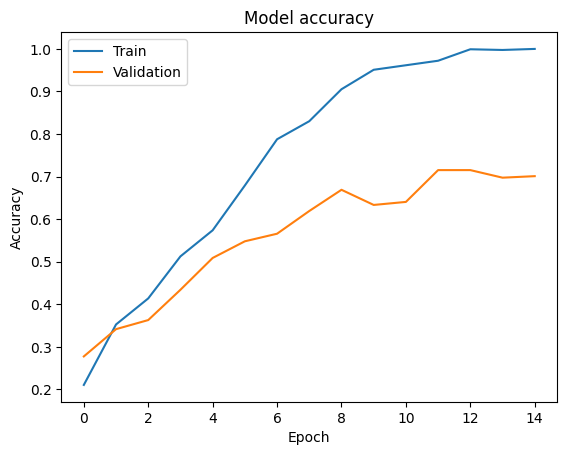

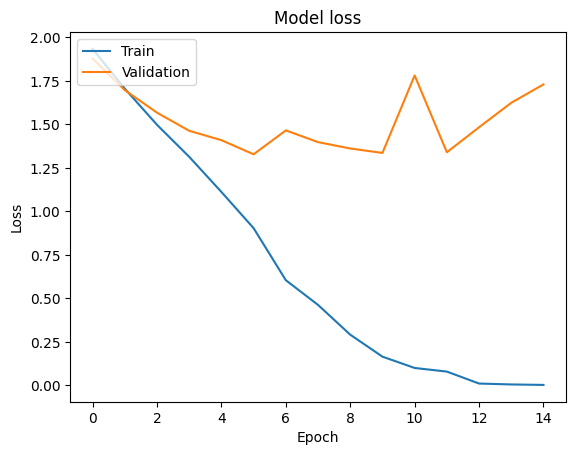

In [608]:
history_dict = history.history

print(history_dict['val_accuracy'])
# Plot training & validation accuracy values
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [611]:
from keras.preprocessing import image
import numpy as np
def image_processing(path):
    test_image = image.load_img(path, target_size = (128, 128))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    return test_image

src = "./Man Upset  Raging Screams Sound Effect (320 kbps).mp3"
dest = "./angry.jpg"
generate_and_save_spectrogram(src,dest)

emotions = ['neutral','calm','happy','sad', 'angry','fearful','disgust','surprised']

res = cnn.predict(image_processing(dest))
print(emotions[np.argmax(res)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
angry


# Save the Model

In [614]:
cnn.save("emotion_80.h5")